# Excercise 2: Multilayer Perceptron
"""
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
"""
- Get mnist data set.
- Prepare test, valid, train sets
- create KNeighborsClassifier, fit it and score using sklearn
- define tensorflow model with 1 hidden layer, fit it and score

# SGDClassifier

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=1/7)

In [5]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train[:10000], y_train[:10000]) 


SVC()

In [6]:
cross_val_score(svm_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.91304348, 0.93403298, 0.92192192])

# KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9708

In [10]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9751

# Keras

In [ ]:
import tensorflow as tf
import numpy as np
X, y = mnist.data, mnist.target
X = X.reshape(70000,28,28,1)
X = X / 255
y = y.astype(np.uint8)
X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y, test_size=1/7)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_full, y_train_full, test_size=1/6)

## MLP

In [19]:
y_train.shape

(50000,)

In [18]:
X_train.shape

(50000, 28, 28, 1)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2116 - accuracy: 0.9370 - val_loss: 0.1333 - val_accuracy: 0.9570
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0875 - accuracy: 0.9728 - val_loss: 0.0967 - val_accuracy: 0.9703
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0584 - accuracy: 0.9816 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0431 - accuracy: 0.9856 - val_loss: 0.0936 - val_accuracy: 0.9753
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.1105 - val_accuracy: 0.9726
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.1087 - val_accuracy: 0.9758
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.1136 - val_accuracy:

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


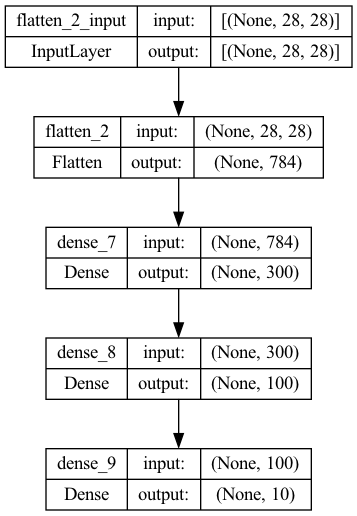

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 597us/step - loss: 0.0865 - accuracy: 0.9795


[0.08648055791854858, 0.9794999957084656]

## CNN

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


2023-03-07 07:38:34.818488: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 38s 24ms/step - loss: 0.1917 - accuracy: 0.9421 - val_loss: 0.0602 - val_accuracy: 0.9819
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0797 - accuracy: 0.9767 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0441 - val_accuracy: 0.9876
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0389 - val_accura

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9927


[0.027834001928567886, 0.9926999807357788]